In [1]:
import sys
!{sys.executable} -m pip install deap

In [2]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset
data = pd.read_csv('./jm1.csv')

# Drop any missing values
data = data.dropna()

# Separate features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# GA code:

#Evaluation function for ranking
def evalMetricRanking(individual):
    # Use the order in the individual to select features
    X_train_ordered = X_train[:, individual]
    X_test_ordered = X_test[:, individual]
    
    # For demonstration, just using first three ordered features for evaluation
    X_train_selected = X_train_ordered[:, :3]
    X_test_selected = X_test_ordered[:, :3]
    
    clf = KNeighborsClassifier()
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setting up the Genetic Algorithm

# Creating types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registering the functions
toolbox = base.Toolbox()
N_FEATURES = X_train.shape[1]
toolbox.register("indices", random.sample, range(N_FEATURES), N_FEATURES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalMetricRanking)

# Running the Genetic Algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)


gen	nevals	avg     	min 	max     
0  	50    	0.782408	0.75	0.797794
1  	36    	0.785864	0.766085	0.797794
2  	34    	0.788594	0.731618	0.797794
3  	36    	0.790285	0.773438	0.797794
4  	43    	0.791572	0.758272	0.801471
5  	36    	0.795754	0.780331	0.801471
6  	37    	0.796847	0.782169	0.801471
7  	37    	0.797417	0.786765	0.801471
8  	35    	0.796756	0.780331	0.801471
9  	40    	0.795165	0.766544	0.801471
10 	34    	0.795726	0.774816	0.801471
11 	38    	0.797344	0.780331	0.801471
12 	39    	0.799384	0.783548	0.801471
13 	34    	0.801158	0.785846	0.801471
14 	34    	0.800404	0.778033	0.801471
15 	40    	0.800267	0.771599	0.801471
16 	44    	0.801112	0.783548	0.801471
17 	45    	0.800754	0.780331	0.801471
18 	37    	0.800184	0.784467	0.801471
19 	38    	0.799853	0.782169	0.801471
20 	28    	0.800965	0.783088	0.801471


([[15, 17, 8, 3, 5, 2, 10, 9, 12, 4, 20, 18, 11, 1, 14, 6, 19, 0, 16, 13, 7],
  [15, 17, 8, 18, 11, 20, 13, 12, 9, 14, 10, 19, 16, 6, 3, 5, 2, 7, 4, 1, 0],
  [15, 17, 8, 3, 10, 2, 5, 9, 14, 12, 18, 7, 16, 6, 0, 11, 19, 20, 4, 1, 13],
  [15, 17, 8, 16, 5, 14, 10, 0, 12, 4, 20, 18, 11, 6, 9, 1, 19, 2, 3, 13, 7],
  [15, 17, 8, 2, 14, 20, 1, 11, 16, 9, 0, 7, 10, 6, 18, 19, 12, 3, 4, 13, 5],
  [15, 17, 8, 12, 11, 0, 7, 20, 19, 1, 16, 4, 14, 6, 10, 2, 3, 18, 5, 13, 9],
  [15, 17, 8, 9, 11, 3, 20, 12, 0, 14, 16, 1, 19, 6, 13, 7, 2, 18, 4, 10, 5],
  [15, 17, 8, 9, 0, 3, 13, 12, 11, 10, 18, 16, 14, 6, 20, 5, 2, 19, 4, 1, 7],
  [15, 17, 8, 3, 20, 2, 7, 14, 5, 9, 13, 19, 10, 6, 12, 1, 4, 0, 18, 11, 16],
  [6, 17, 8, 3, 9, 14, 7, 13, 19, 12, 10, 2, 5, 15, 0, 16, 20, 18, 4, 11, 1],
  [15, 17, 8, 3, 5, 14, 13, 0, 12, 20, 16, 1, 9, 6, 19, 11, 2, 18, 4, 7, 10],
  [15, 17, 8, 3, 5, 14, 13, 0, 12, 20, 16, 1, 9, 6, 19, 11, 2, 18, 4, 7, 10],
  [15, 17, 8, 3, 11, 2, 14, 18, 20, 9, 7, 13, 10, 6, 12, 1, 5, 0

Best ranked features:  [15, 17, 8]
Accuracy:  0.8014705882352942
              precision    recall  f1-score   support

       False       0.83      0.95      0.89      1757
        True       0.46      0.19      0.27       419

    accuracy                           0.80      2176
   macro avg       0.65      0.57      0.58      2176
weighted avg       0.76      0.80      0.77      2176



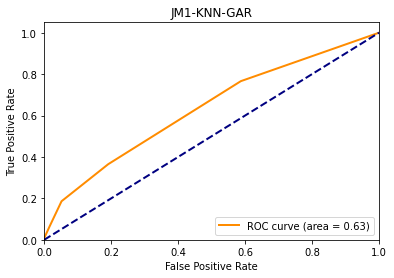

In [4]:
# Train and evaluate the KNN classifier using the best ranked features
best_ranking = hof[0]
# Let's say we use the top 3 ranked features (you can adjust this number)
selected_features = best_ranking[:3]
print("Best ranked features: ", selected_features)

X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

clf = KNeighborsClassifier()
clf.fit(X_train_selected, y_train)

# Test the classifier
y_pred = clf.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test_selected)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./AUC_Extracts/JM1/JM1_KNN_GAR.csv', index=False)

# Plot
plt.figure()
lw = 2  # line width
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('JM1-KNN-GAR')
plt.legend(loc="lower right")
plt.show()
